In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [38]:
df =pd.read_csv(r"C:\Users\CHARAN\Downloads\bank-full.csv" ,delimiter=";")

In [39]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [40]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder

In [45]:
 LE = LabelEncoder()
df["job"]=LE.fit_transform(df["job"])
df["marital"]=LE.fit_transform(df["marital"])
df["education"]=LE.fit_transform(df["education"])
df["default"] = LE.fit_transform(df["default"])
df["housing"]=LE.fit_transform(df["housing"])
df["loan"]=LE.fit_transform(df["loan"])
df["contact"]=LE.fit_transform(df["contact"])
df["month"]=LE.fit_transform(df["month"])
df["poutcome"]=LE.fit_transform(df["poutcome"])
df["y"]=LE.fit_transform(df["y"])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [46]:
len(list(df))

17

In [49]:
X= df.iloc[:,0:16]
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [50]:
Y = df["y"]
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)

C:\Users\CHARAN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
Y_pred_train =LR.predict(X_train)
Y_pred_test =LR.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
ac1 = accuracy_score(Y_train,Y_pred_train)
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Accuracy Score Training data:",ac1.round(3))
print("Accuracy Score Training data:",ac2.round(3))

Accuracy Score Training data: 0.887
Accuracy Score Training data: 0.892


In [60]:
PS1 = precision_score(Y_train,Y_pred_train)
PS2 = precision_score(Y_test,Y_pred_test)
print("Precision_score:",PS1.round(3))
print("Precision_score:",PS2.round(3))

Precision_score: 0.578
Precision_score: 0.583


In [62]:
RS1 = recall_score(Y_train,Y_pred_train)
RS2 = recall_score(Y_test,Y_pred_test)
print("Recall Score Training data:",RS1.round(3))
print("Recall Score Training data:",RS2.round(3))

Recall Score Training data: 0.163
Recall Score Training data: 0.162


In [63]:
f1 =f1_score(Y_train,Y_pred_train)
f2 = f1_score(Y_test,Y_pred_test)
print("Recall Score Training data:",f1.round(3))
print("Recall Score Training data:",f2.round(3))

Recall Score Training data: 0.254
Recall Score Training data: 0.253


In [65]:
LR.predict(X)
Y_probabilities =LR.predict_proba(X)[:,1]


In [66]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,NA = roc_curve(Y,Y_probabilities)


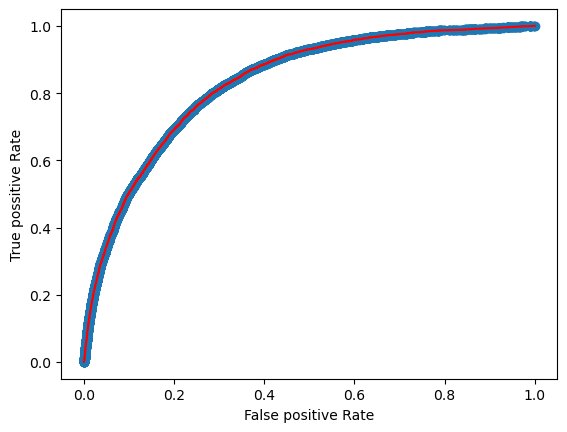

who age subscribed a term deposit under curve score: 0.832349764779077


In [67]:
import matplotlib.pyplot as plt
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr,color='red')
plt.xlabel("False positive Rate")
plt.ylabel("True possitive Rate")
plt.show()
print("who age subscribed a term deposit under curve score:",roc_auc_score(Y,Y_probabilities))